In [ ]:
#Hello this is K-means example

<class 'pandas.core.frame.DataFrame'>
(3000, 2)
          V1         V2
0   2.072345  -3.241693
1  17.936710  15.784810
2   1.083576   7.319176
3  11.120670  14.406780
4  23.711550   2.557729
(3000, 2)


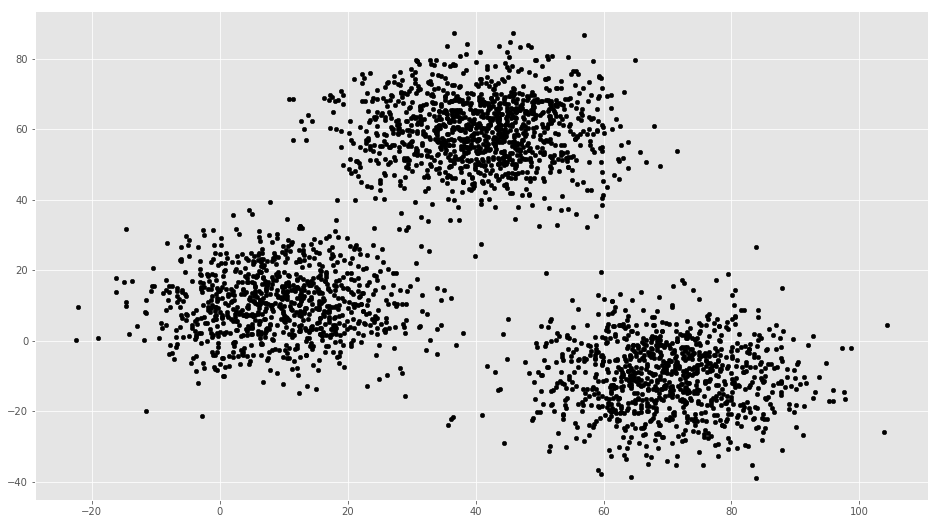

In [115]:
#matplotlib inline
from copy import deepcopy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize']=(16,9)
plt.style.use('ggplot')

#Importing the data set
data=pd.read_csv('/Users/eli/Documents/Data_science/python3/K-means/friendly-fortnight-master/xclara.csv')
print(type(data))
print(data.shape)
print(data.head())

#getting values to plot
f1=data['V1'].values
f2=data['V2'].values
X=np.array(list(zip(f1,f2)))


print(X.shape)
plt.scatter(f1,f2,c='black',s=20)

In [98]:
#Eucledian distance calculator
def dist(a,b,ax=1):
    return np.linalg.norm(a-b,axis=ax)

In [126]:
#Number of clusters
k=3
#X coordinates of random centroids
C_x=np.random.randint(0,np.max(X)-20,size=k)
#Y coordinates of random centroids
C_y=np.random.randint(0,np.max(X)-20,size=k)
C=np.array(list(zip(C_x,C_y)),dtype=np.float32)
print(C)

[[78. 27.]
 [78. 17.]
 [30. 15.]]


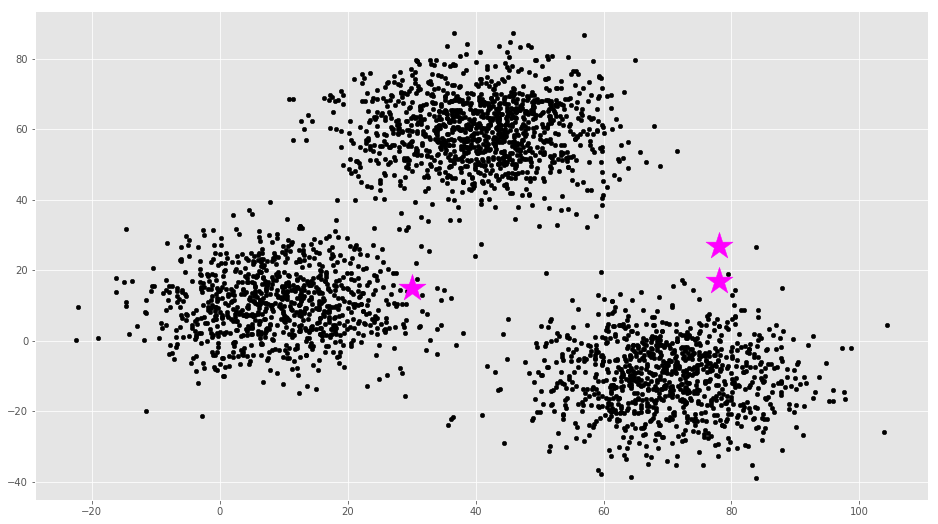

In [127]:
#Plotting along with the Centroids
plt.scatter(f1,f2,c='black',s=20)
plt.scatter(C_x,C_y,c='magenta',s=800, marker='*')

In [128]:
#to store the value of centroids when it updates
C_old=np.zeros(C.shape)
#cluster labels (0,1,2)
clusters=np.zeros(len(X))
#error function - Distance between new centroids and old centroids
error=dist(C,C_old,None)
print(C)
print(C_old)
print(error)


[[78. 27.]
 [78. 17.]
 [30. 15.]]
[[0. 0.]
 [0. 0.]
 [0. 0.]]
119.62859190009719


In [129]:
# Loop will run till the error becomes zero
while error != 0:
    # Assigning each value to its closest cluster
    for i in range(len(X)):
        distances = dist(X[i], C)
        cluster = np.argmin(distances)
        clusters[i] = cluster
    # Storing the old centroid values
    C_old = deepcopy(C)
    # Finding the new centroids by taking the average value
    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        C[i] = np.mean(points, axis=0)
    error = dist(C, C_old, None)
    print(error)

55.02716
20.816288
4.615162
0.20916209
0.0


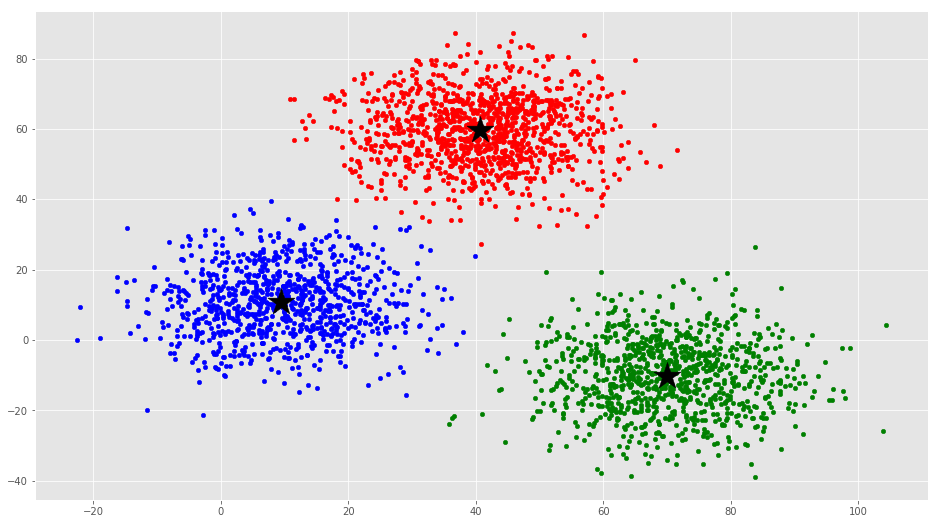

In [130]:
colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
for i in range(k):
    points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
    ax.scatter(points[:,0],points[:,1],s=20,c=colors[i])
ax.scatter(C[:,0],C[:,1],marker='*',s=800,c='black')    

In [131]:
points.shape

(899, 2)

In [153]:
#The scikit-learn approach
#Example 1
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
# Number of clusters
sil_coeff=np.zeros([1,5])
for u in [2,3,4,5,6]:
    kmeans = KMeans(n_clusters=u)
    # Fitting the input data
    kmeans = kmeans.fit(X)
    # Getting the cluster labels
    labels = kmeans.predict(X)
    #calculating the silhouette
    #the mean intra-cluster distance ( a ) and the mean nearest-cluster distance ( b ) for each sample oscillated from 1 to -1
    sil_coeff[0,u-2] = silhouette_score(X, labels, metric='euclidean')#oscillates from 0 to 1 and the bigger the better fit
    # Centroid values
    centroids = kmeans.cluster_centers_

[[0.54243507 0.69455877 0.53349609 0.40774084 0.30953692]]


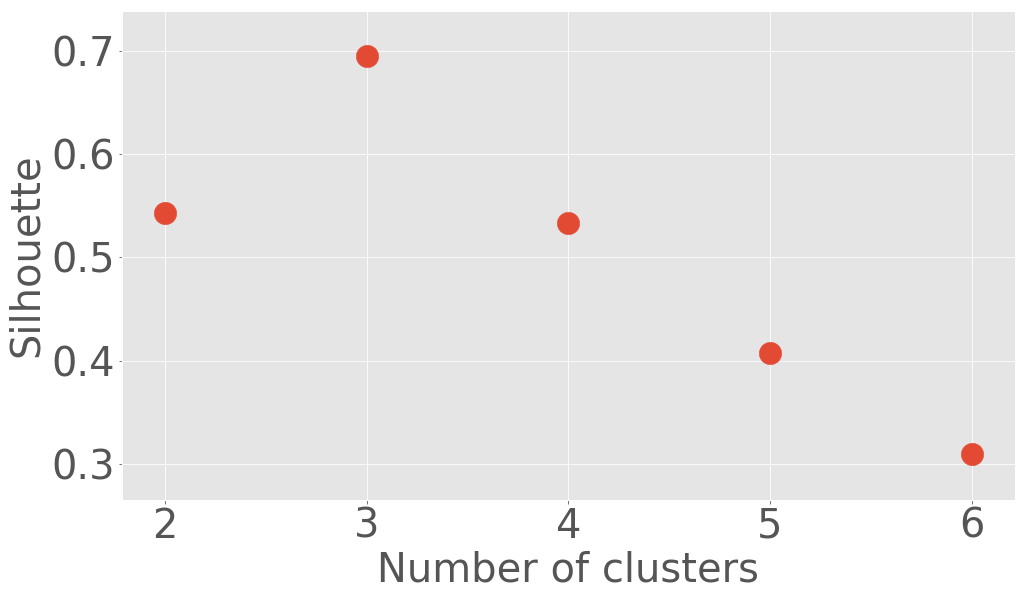

In [166]:
print(sil_coeff)
plt.scatter(([2,3,4,5,6]),sil_coeff,s=500)
plt.xlabel('Number of clusters',fontsize=40)
plt.ylabel('Silhouette',fontsize=40)
plt.tick_params(labelsize=40)


<BarContainer object of 3000 artists>

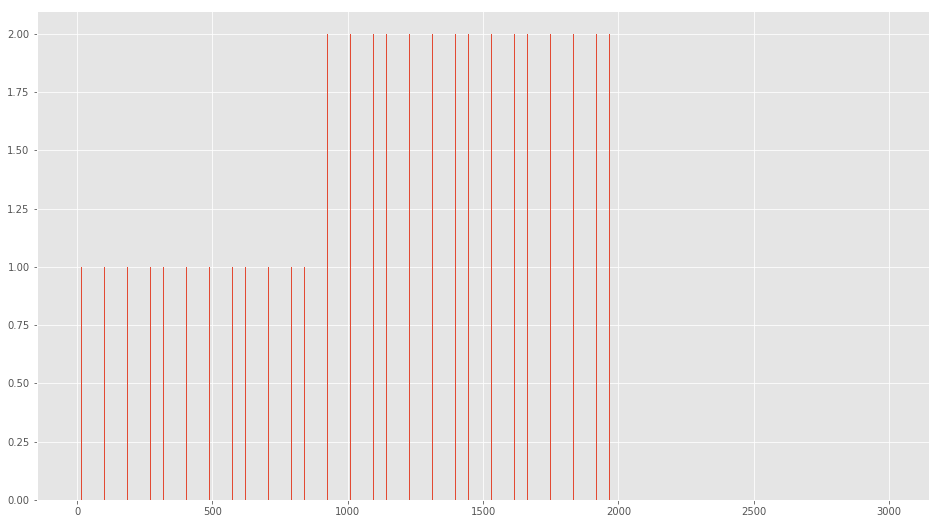

In [135]:
plt.bar(range(len(labels)),labels,width=0.05)

In [136]:
# Comparing with scikit-learn centroids
print(C) # From Scratch
print(centroids) # From sci-kit learn

[[ 40.683628  59.715893]
 [ 69.92419  -10.119641]
 [  9.478045  10.686052]]
[[ 69.92418447 -10.11964119]
 [  9.4780459   10.686052  ]
 [ 40.68362784  59.71589274]]


In [137]:
kmeans.max_iter()

TypeError: 'int' object is not callable

In [151]:
sil_coeff=np.zeros([1,5])
sil_coeff[0,2]

0.0

In [170]:
#We will generate a new dataset using make_blobs function.
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

plt.rcParams['figure.figsize'] = (16, 9)
# Creating a sample dataset with 4 clusters
X, y = make_blobs(n_samples=800, n_features=3, centers=4)

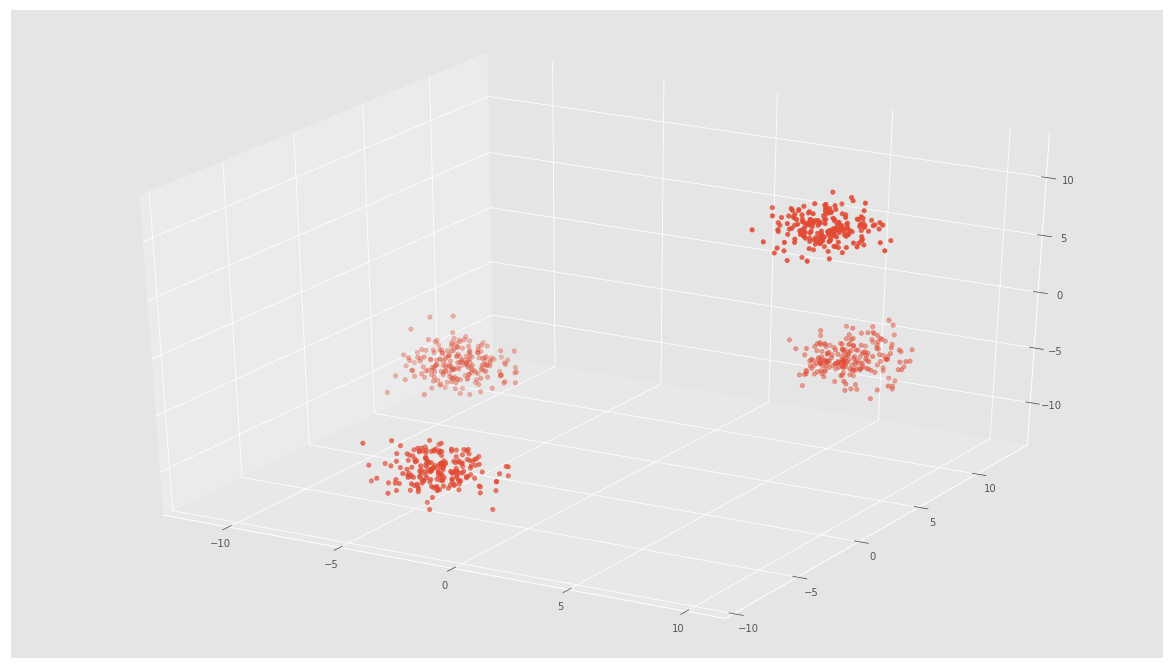

In [171]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2])

In [172]:
# Initializing KMeans
kmeans = KMeans(n_clusters=4)
# Fitting with inputs
kmeans = kmeans.fit(X)
# Predicting the clusters
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_

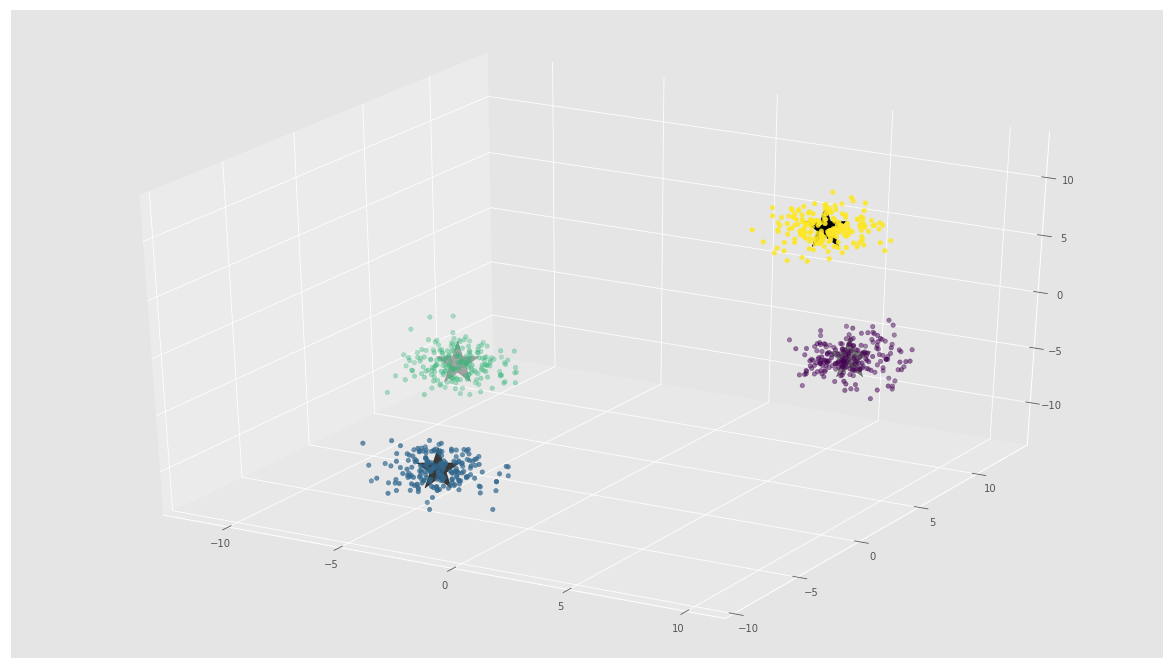

In [179]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c='black', s=2000)